# Example of masks

## Creating an instance 

In [1]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

from numpy import loadtxt

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[10,10]

## xz mask from a x mask: constant refraction index

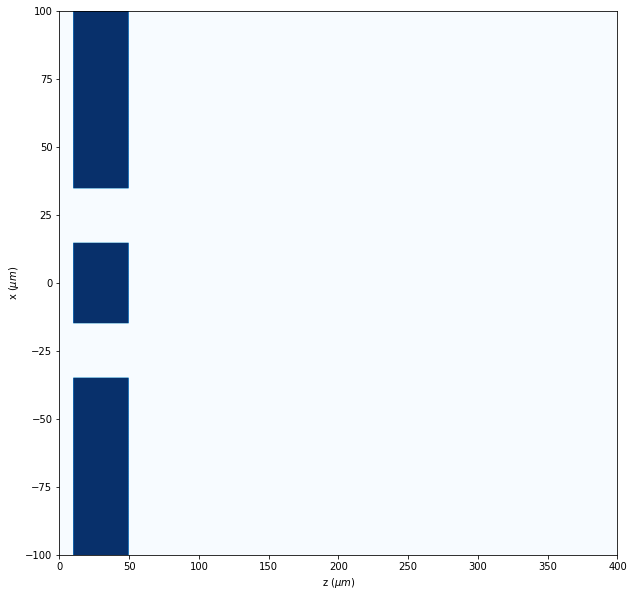

In [3]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um
v_globals = dict(z0=z0, z1=z1)
t1.convert_mask(
    t=t0, z0=z0, z1=z1, refraction_index=1.5, v_globals=v_globals)
t1.draw_refraction_index(draw_borders=False, );

## mask from two functions

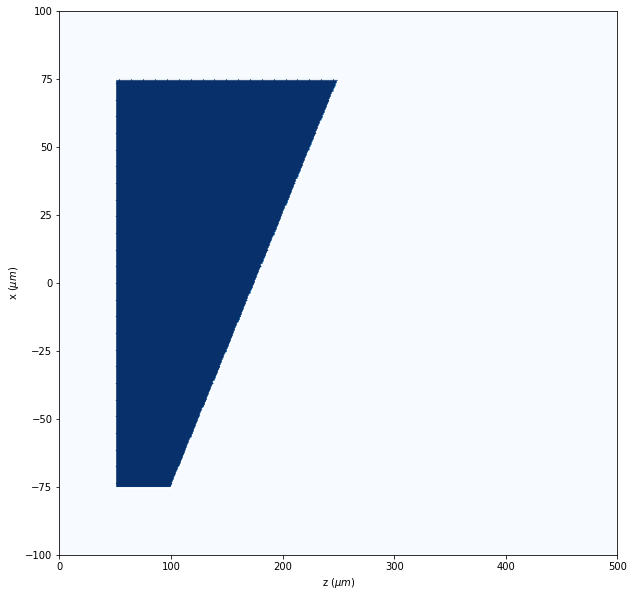

In [4]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = 0.6238 * um

f1 = '50 * um'
f2 = "175*um+np.tan(45*degrees)*(self.X-0*um)"
z_sides = (-75 * um, 75 * um)
v_globals = {'um': 1, 'np': np}

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.mask_from_function(
    r0=(0, 0),
    refraction_index=1.5,
    f1=f1,
    f2=f2,
    z_sides=z_sides,
    angle=0 * degrees,
    v_globals=v_globals)

t1.draw_refraction_index();

## mask from surfaces defined in file

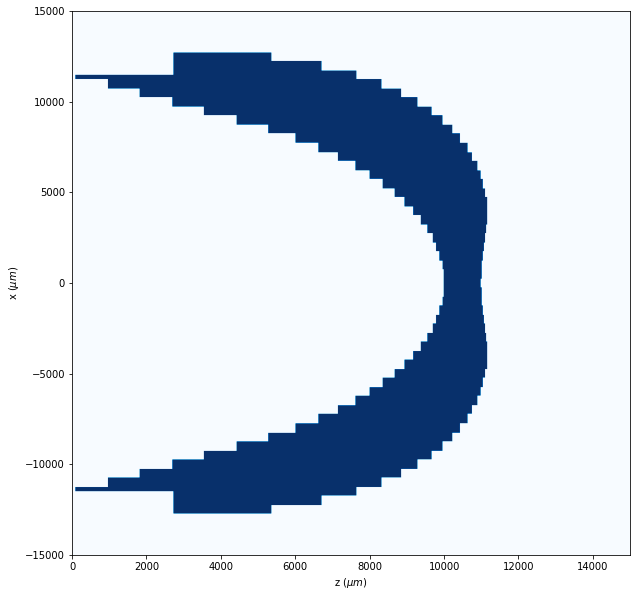

In [5]:
x = np.linspace(-15 * mm, 15 * mm, 512)
z = np.linspace(0 * mm, 15 * mm, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)

profile1 = loadtxt('profile1.txt')
profile2 = loadtxt('profile2.txt')
profile1[:, 1] = np.abs(profile1[:, 1])
profile2[:, 1] = np.abs(profile2[:, 1])
t1.mask_from_array(
    r0=(0 * um, 0 * um),
    refraction_index=1.5,
    array1=profile1 * 1000,  # pasar a micras
    array2=profile2 * 1000,  # pasar a micras
    x_sides=(-15 * mm, 15 * mm),
    angle=0 * degrees,
    v_globals={},
    interp_kind='nearest')

t1.draw_refraction_index(draw_borders=False);

## mask from several surfaces

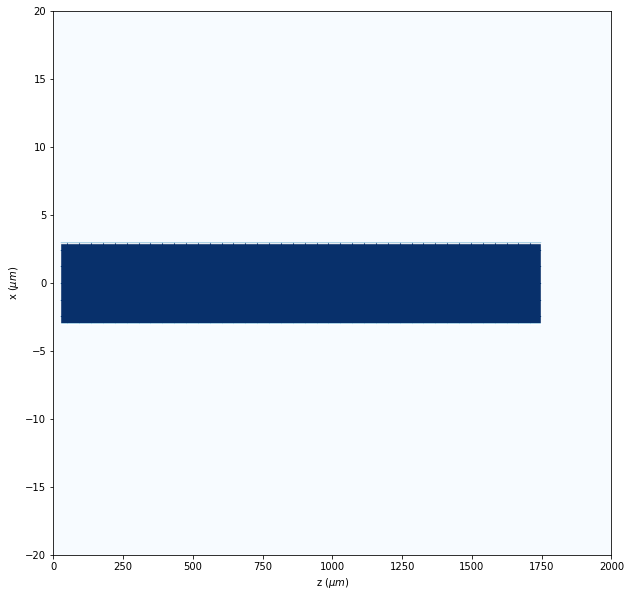

In [6]:
x0 = np.linspace(-20 * um, 20 * um, 512)
z0 = np.linspace(0 * um, 2000 * um, 512)
wavelength = 2 * um

r0 = (0, 0)
refraction_index = 4
Fs = ['Xrot<3*um', 'Xrot>-3*um', 'Zrot>25*um', 'Zrot<1750*um']
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.object_by_surfaces(
    r0, refraction_index, Fs, angle=0 * degrees, v_globals={})

t1.draw_refraction_index(draw_borders=True);

## Refraction index from functions

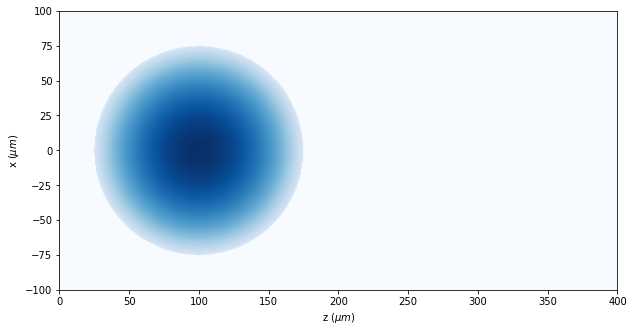

In [7]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)

wavelength = 0.5 * um

t0 = Scalar_mask_XZ(
    x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(
    n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t0.sphere(
    r0=center,
    radius=(radius, radius),
    refraction_index=ref_index,
    angle=0)

t0.draw_refraction_index(draw_borders=False, scale='scaled');

## get xz mask from a x mask: variable refraction index

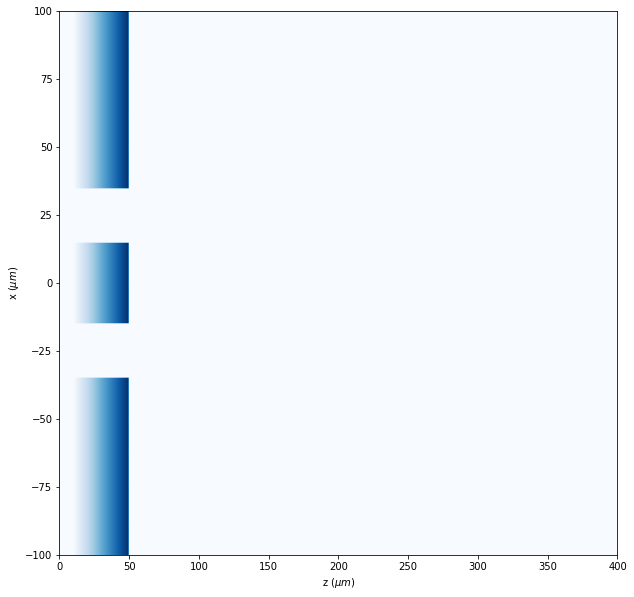

In [8]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um
v_globals = dict(z0=z0, z1=z1)
t1.convert_mask(
    t=t0,
    z0=z0,
    z1=z1,
    refraction_index='1+0.25*(z-z0)/(z1-z0)',
    v_globals=v_globals)
t1.draw_refraction_index(draw_borders=False, );

variable_refraction_index_2

"""Here the refraction index is a function of positions z"""

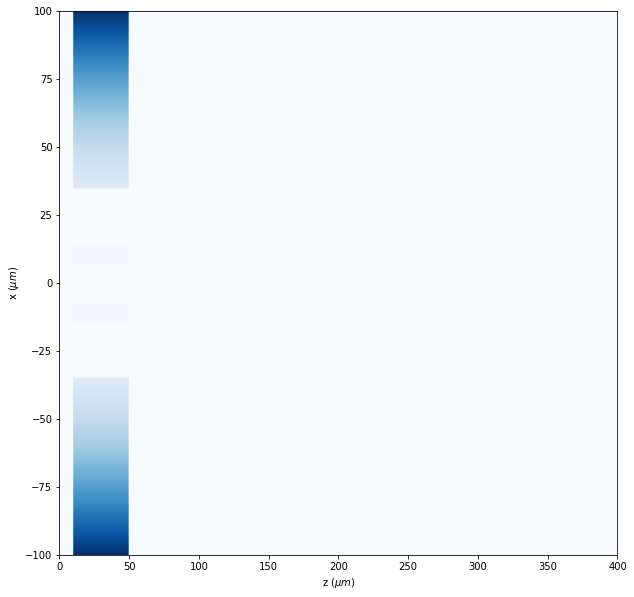

In [9]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .5 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

z_min = 10 * um
z_max = 50 * um
v_globals = dict(np=np)
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
t1.convert_mask(
    t=t0,
    z0=z_min,
    z1=z_max,
    refraction_index='1+0.25*np.abs(x/200)**2',
    v_globals=v_globals)
t1.draw_refraction_index(draw_borders=False);

## discretize_refraction_index

Dx=0.391389432485326


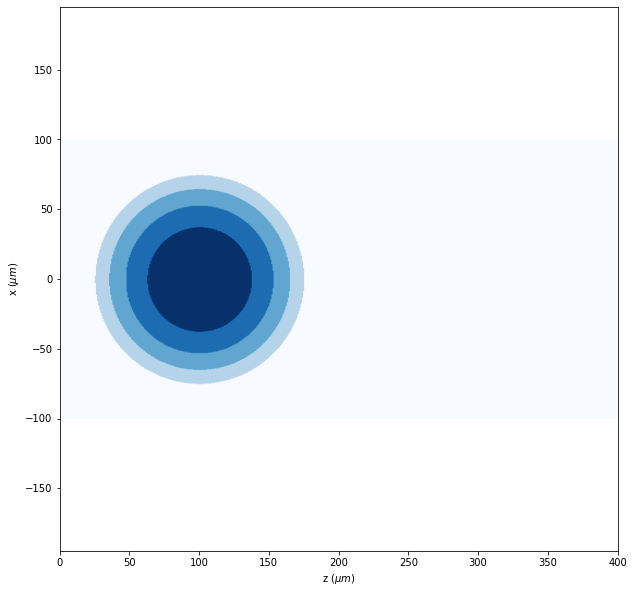

In [10]:
x0 = np.linspace(-100 * um, 100 * um, 512)
print("Dx={}".format(x0[1] - x0[0]))
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 50 * um

t0 = Scalar_mask_XZ(
    x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(
    n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t0.sphere(
    r0=center,
    radius=(radius, radius),
    refraction_index=ref_index,
    angle=0)

t0.discretize_refraction_index(n_layers=np.linspace(1.5, 4, 5))

t0.draw_refraction_index(draw_borders=False, scale='equal');

### wessenplatten

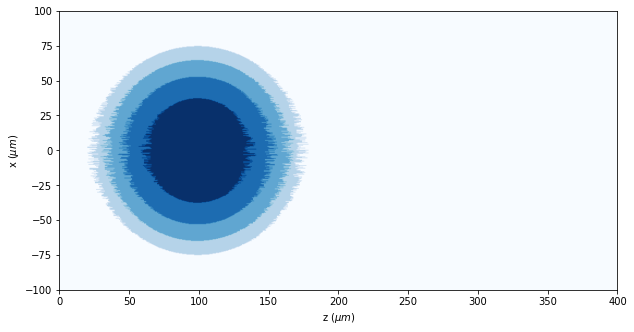

In [11]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 50 * um

t0 = Scalar_mask_XZ(
    x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(
    n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t0.sphere(
    r0=center,
    radius=(radius, radius),
    refraction_index=ref_index,
    angle=0)

t0.wessenplatten(
    n_layers=np.linspace(1.5, 4, 5),
    sigma=10 * um,
    correlation_length=25 * um,
)

t0.draw_refraction_index(draw_borders=False, scale='scaled');

## add_masks
Complex structures can be performed by adding different masks.

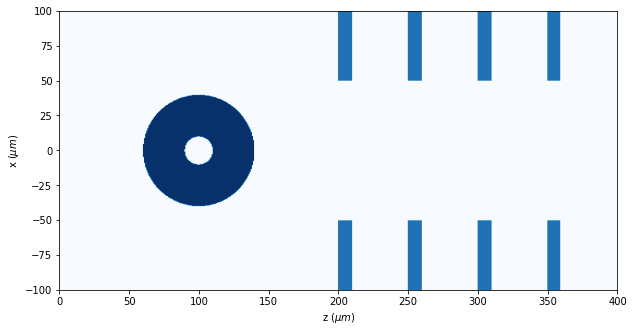

In [12]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.sphere(
    r0=(0, 100 * um),
    radius=(40 * um, 40 * um),
    refraction_index=2.5,
    angle=0)

t1.sphere(
    r0=(0, 100 * um),
    radius=(10 * um, 10 * um),
    refraction_index=1,
    angle=0)

for pos_slit in [200, 250, 300, 350]:
    t1.slit(
        r0=(0 * um, pos_slit * um),
        aperture=100 * um,
        depth=10 * um,
        refraction_index=1.5 - 1.5j,
        refraction_index_center='',
        angle=0 * degrees)

t1.draw_refraction_index(draw_borders=False, scale='scaled');

## mask from an image

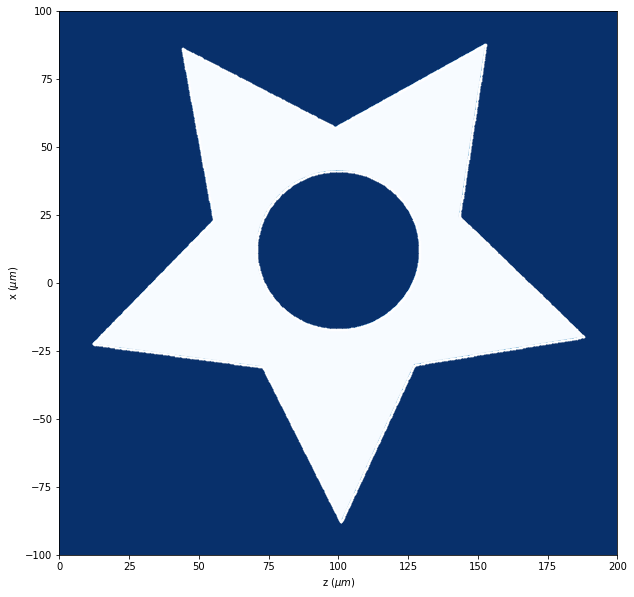

In [13]:
x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 200 * um, 1024)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

filename = "star_hole.png"
t1.image(
    filename=filename,
    n_max=2,
    n_min=1,
    angle=0 * degrees,
    invert=False)
t1.draw_refraction_index();

## semi plane

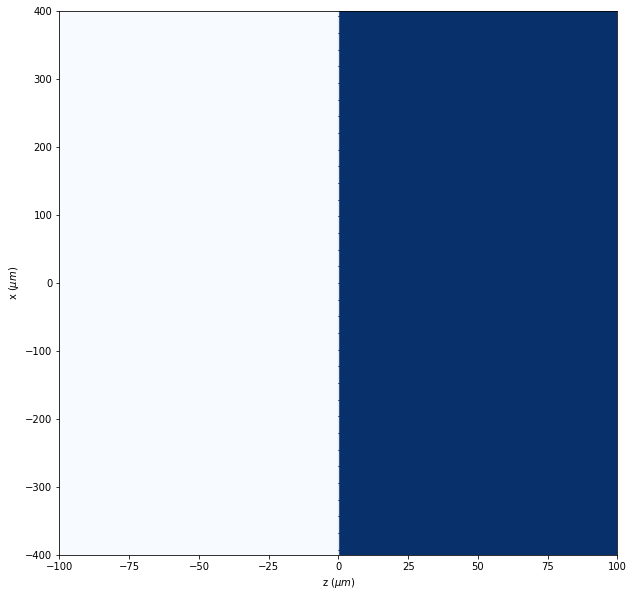

In [14]:
x0 = np.linspace(-400 * um, 400 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_plane(
    r0=(0, 0),
    refraction_index=2,
    angle=0 * degrees,
    rotation_point=None)
t1.draw_refraction_index();

## layer

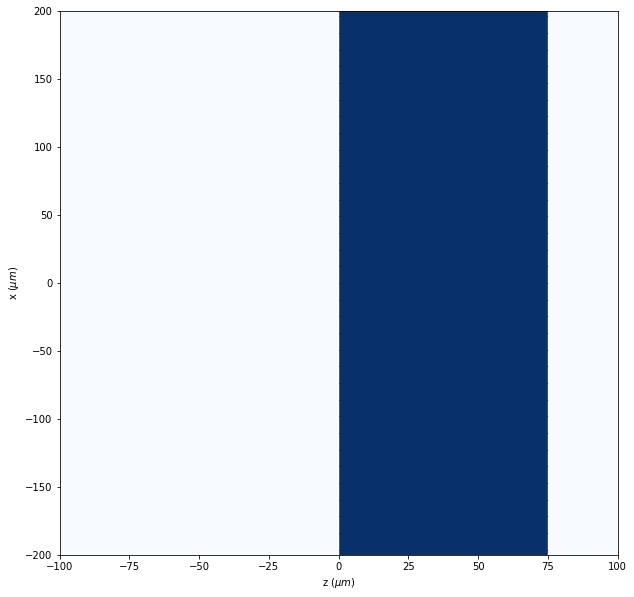

In [15]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.layer(
    r0=(50, 0),
    depth=75 * um,
    refraction_index=2,
    angle=0 * degrees,
    rotation_point=None)
t1.draw_refraction_index();

## rectangle

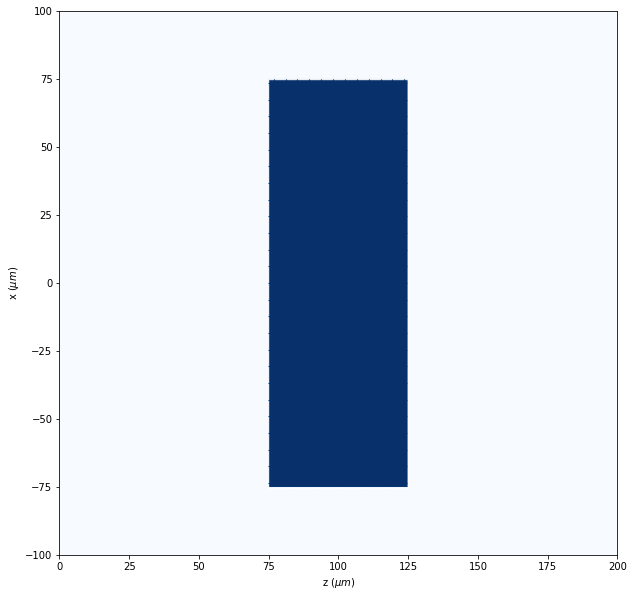

In [16]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rectangle(
    r0=(0 * um, 100 * um),
    size=(150 * um, 50 * um),
    angle=0 * degrees,
    refraction_index=1.5)
t1.draw_refraction_index();

## slit

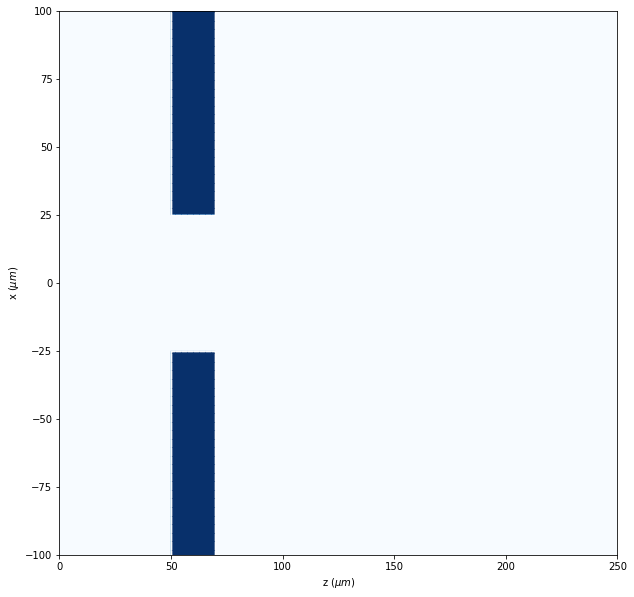

In [17]:
x0 = np.linspace(-100 * um, 100 * um, 512 * 4)
z0 = np.linspace(0 * um, 250 * um, 512 * 4)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.slit(
    r0=(0 * um, 50 * um),
    aperture=50 * um,
    depth=20 * um,
    refraction_index=1.5 + 1j,
    refraction_index_center='',
    angle=0 * degrees)

t1.draw_refraction_index();

## sphere or ellipsoid

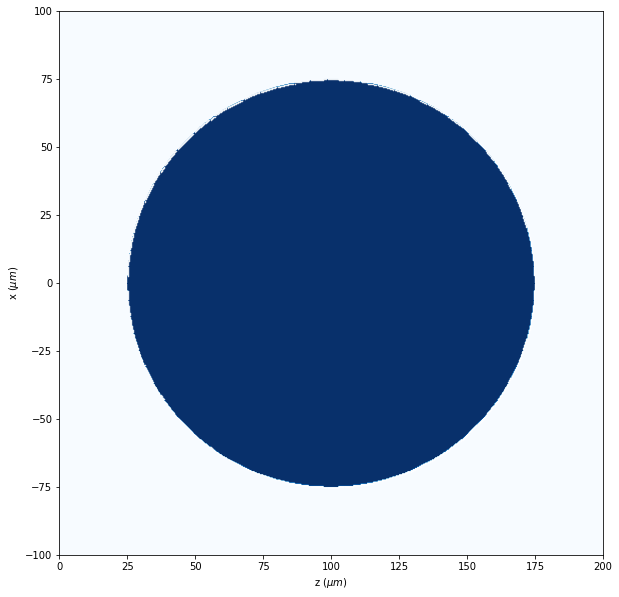

In [18]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.sphere(
    r0=(0, 100 * um),
    radius=(75 * um, 75 * um),
    refraction_index=1.5,
    angle=0 * degrees)

t1.draw_refraction_index(scale='scaled');

## semi sphere

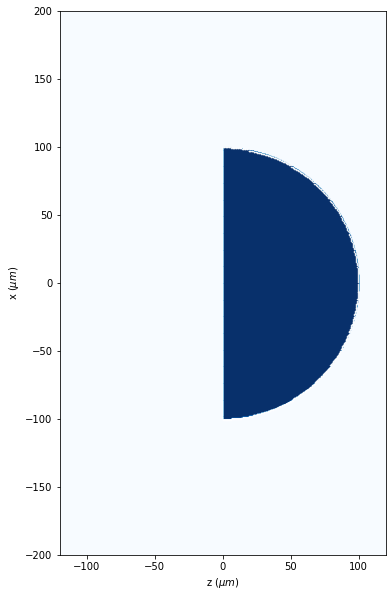

In [19]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-120 * um, 120 * um, 512)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.semi_sphere(
    r0=(0, 0),
    radius=(100, 100),
    refraction_index=2,
    angle=0 * degrees)

t1.draw_refraction_index(
    draw_borders=True, min_incr=0.01, scale='scaled');

## aspheric_surface_z

## aspheric_lens

## wedge

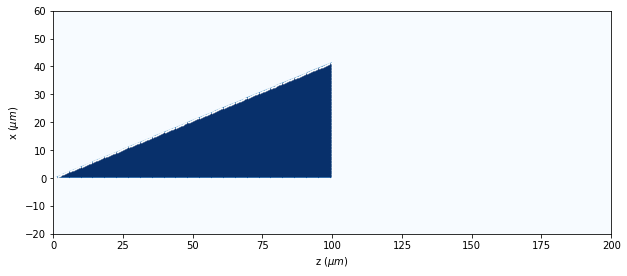

In [20]:
x0 = np.linspace(-20 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.wedge(
    r0=(0, 0),
    length=100 * um,
    refraction_index=1.5,
    angle_wedge=22.5 * degrees,
    angle=0 * degrees,
    rotation_point=None)
t1.draw_refraction_index(scale='scaled');

## prism

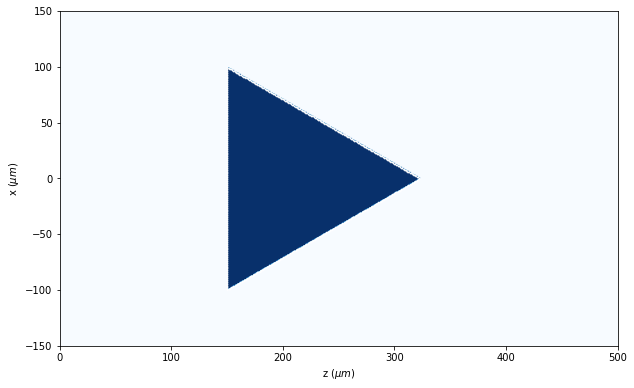

In [21]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 4096)
wavelength = 2 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.prism(
    r0=(100 * um, 150 * um),
    length=200 * um,
    refraction_index=2,
    angle_prism=60 * degrees,
    angle=90 * degrees)
t1.draw_refraction_index(scale='scaled');

## biprism

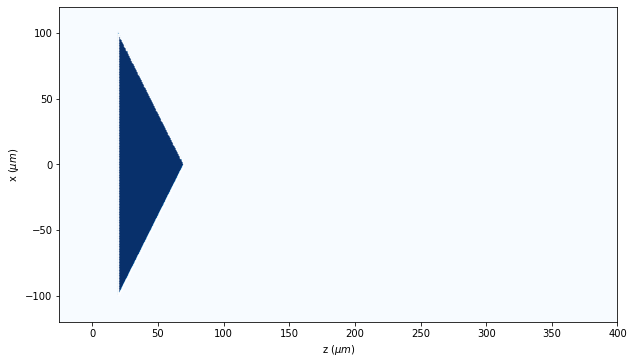

In [22]:
x0 = np.linspace(-120 * um, 120 * um, 512)
z0 = np.linspace(-25 * um, 400 * um, 4096)
wavelength = .5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.biprism(
    r0=(0, 20*um),
    length=200 * um,
    height=50 * um,
    refraction_index=1.5,
    angle=0)
t1.draw_refraction_index(draw_borders=True, scale='scaled');

## Ronchi grating

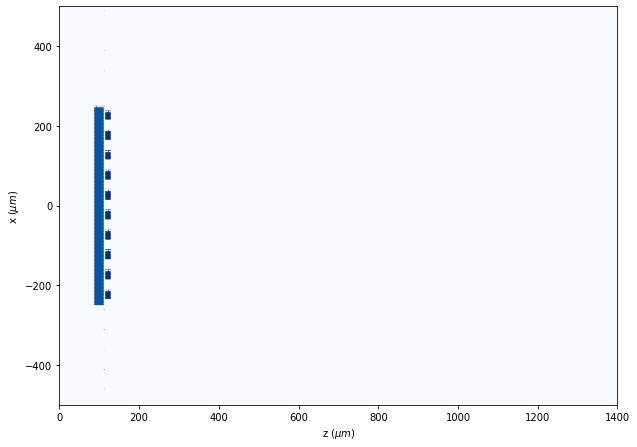

In [23]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(0 * um, 1400 * um, 512)
wavelength = 0.5 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.ronchi_grating(
    period=50 * um,
    fill_factor=.5,
    length=500 * um,
    height=20 * um,
    r0=(0 * um, 100 * um),
    Dx=2 * um,
    refraction_index=1.5 + 0.5j,
    heigth_substrate=25 * um,
    refraction_index_substrate=1.5,
    angle=0 * degrees)

t1.draw_refraction_index(scale='scaled');

## Grating with substrate

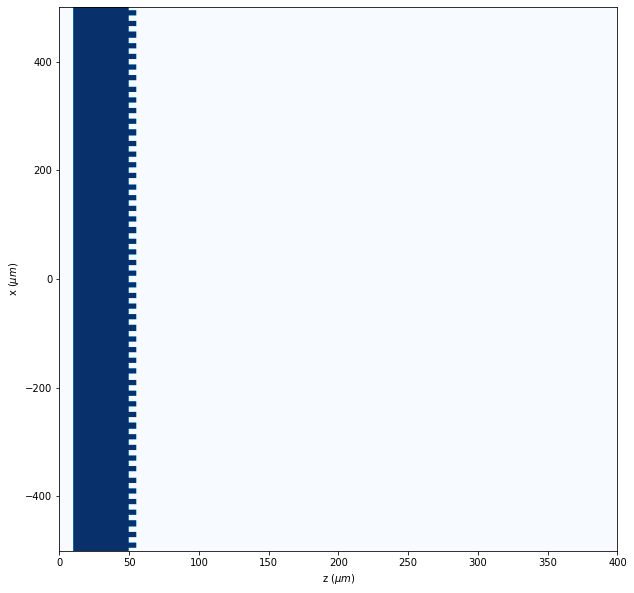

In [24]:
x0 = np.linspace(-500 * um, 500 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = .55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.slit(x0=0, size=0 * um)

t1 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.ronchi_grating(period=20 * um, x0=0 * um, fill_factor=0.5)

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t2.convert_mask(t=t0, z0=10 * um, z1=50 * um, refraction_index=1.5)
t2.convert_mask(
    t=t1, z0=50 * um, z1=55.5 * um, refraction_index=1.5)

t2.draw_refraction_index(draw_borders=False);

## sine grating

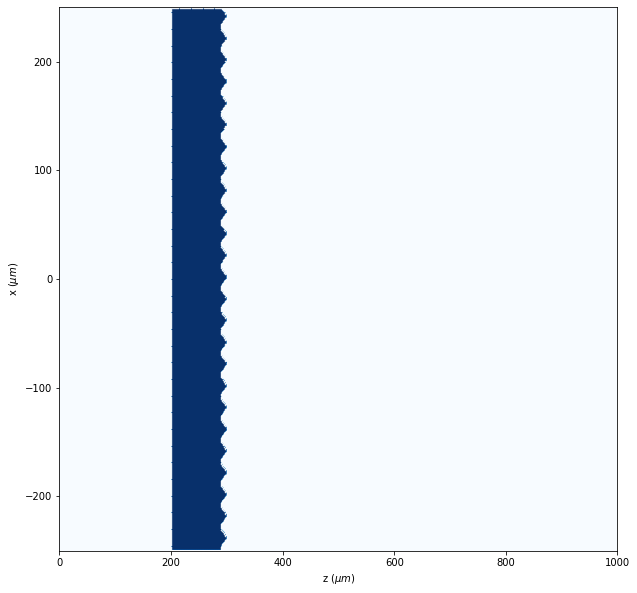

In [25]:
x0 = np.linspace(-250 * um, 250 * um, 512)
z0 = np.linspace(0 * um, 1000 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

t1.sine_grating(
    period=20 * um,
    heigth_sine=10 * um,
    heigth_substrate=100 * um,
    r0=(0 * um, 200 * um),
    length=500 * um,
    Dx=2 * um,
    refraction_index=1.5,
    angle=0 * degrees)

t1.draw_refraction_index();

## probe

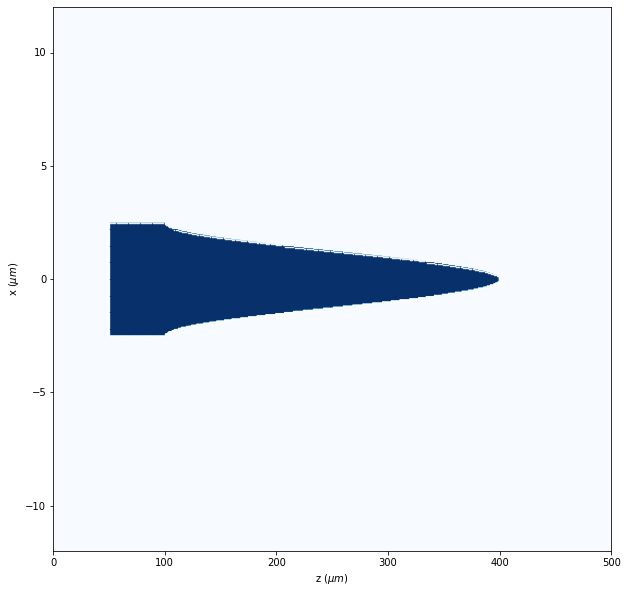

In [26]:
x0 = np.linspace(-12 * um, 12 * um, 512)
z0 = np.linspace(0 * um, 500 * um, 512)
wavelength = .6 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.probe(
    r0=(0, 50 * um),
    base=5 * um,
    length=300 * um,
    refraction_index=1.5,
    angle=0 * degrees)

t1.draw_refraction_index();

## convergent plane lens

focus distance f=12000.0 um


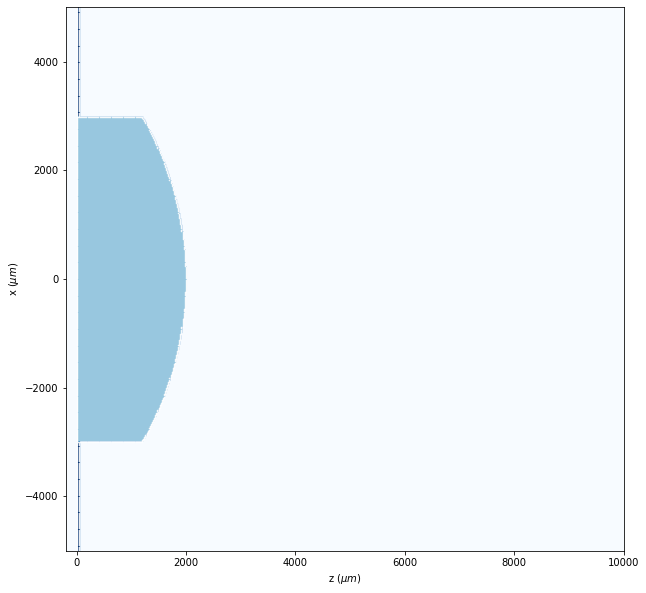

In [27]:
x0 = np.linspace(-5*mm, 5*mm, 512)
z0 = np.linspace(-200 * um, 10*mm, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal,_ = t1.lens_plane_convergent(
    r0=(0, 0),
    aperture=6*mm,
    radius=6*mm,
    thickness=2*mm,
    refraction_index=1.5,
    angle=0 * degrees,
    mask=(50 * um, 1 + 2.05j))
print("focus distance f={} um".format(focal))

t1.draw_refraction_index();

## convergent lens

focus distance f=3310.34 um


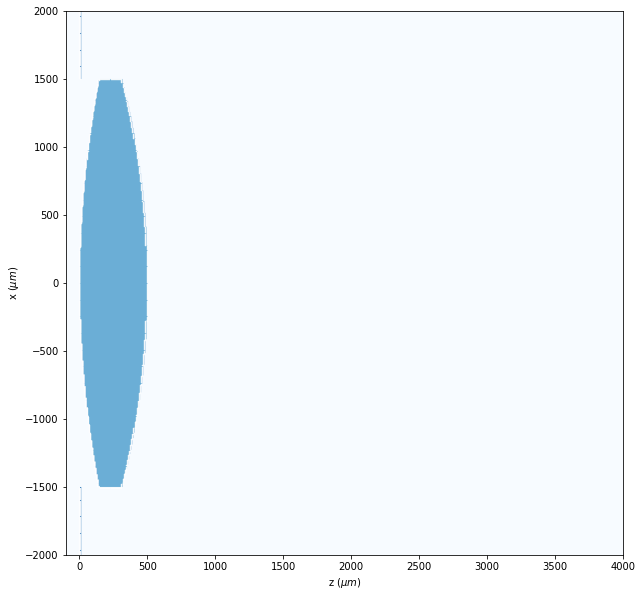

In [28]:
x0 = np.linspace(-2000 * um, 2000 * um, 512)
z0 = np.linspace(-100 * um, 4*mm, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal,_ = t1.lens_convergent(
    r0=(0, 0),
    aperture=3*mm,
    radius=(8*mm, -6*mm),
    thickness=500 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print("focus distance f={:2.2f} um".format(focal))

t1.draw_refraction_index(scale='scaled');

## divergent plane lens

focus distance f=1500.0 um


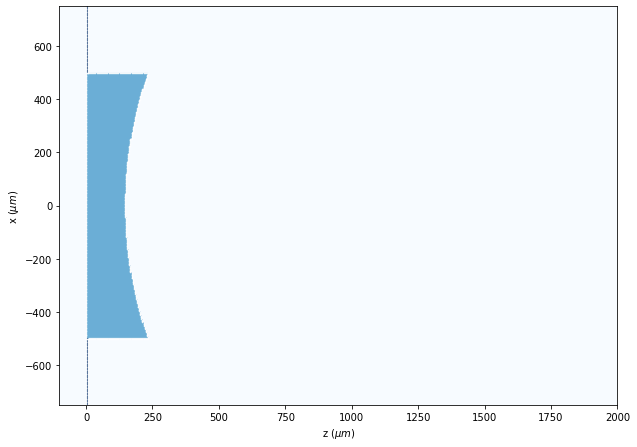

In [29]:
x0 = np.linspace(-750 * um, 750 * um, 512)
z0 = np.linspace(-100 * um, 2000 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal,_ = t1.lens_plane_divergent(
    r0=(0, 0),
    aperture=1000 * um,
    radius=1500 * um,
    thickness=150 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print("focus distance f={} um".format(focal))

t1.draw_refraction_index(scale='scaled');

## divergent lens

focus distance f=-180.0 um


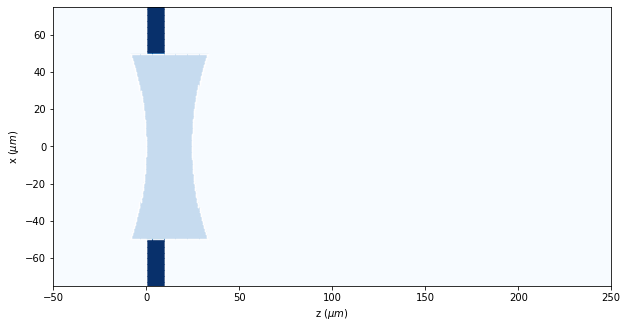

In [30]:
x0 = np.linspace(-75 * um, 75 * um, 512)
z0 = np.linspace(-50 * um, 250 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

focal,_ = t1.lens_divergent(
    r0=(0, 0),
    aperture=100 * um,
    radius=(-150 * um, 150 * um),
    thickness=25 * um,
    refraction_index=1.5,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print("focus distance f={} um".format(focal))
t1.draw_refraction_index(scale='scaled');

## rough surface

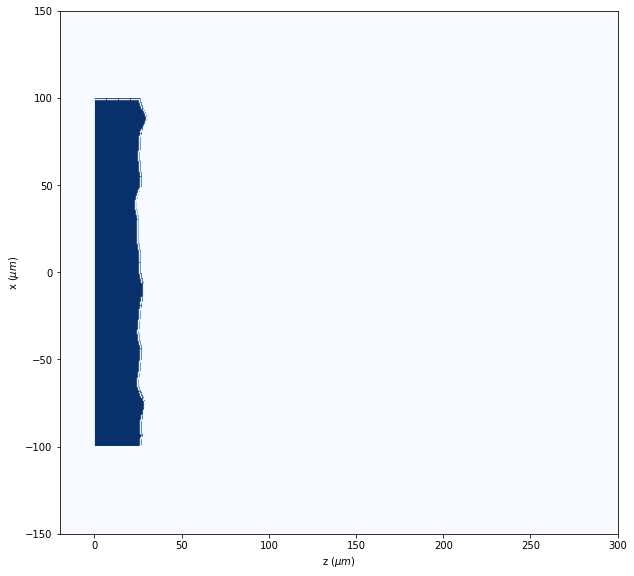

In [31]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(-20 * um, 300 * um, 512)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.rough_sheet(
    r0=(0 * um, 0 * um),
    size=(200 * um, 25 * um),
    t=10 * um,
    s=10 * um,
    refraction_index=1.5,
    angle=0,
    rotation_point=None)
t1.draw_refraction_index(scale='scaled');